In [1]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join


In [2]:
import pandas as pd
import numpy as np

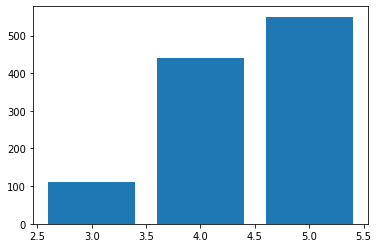

In [3]:
import matplotlib.pyplot as plt

dataset=pd.read_csv("iphonevaluemoney2.csv")
summarised_results = dataset["stars"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [4]:
df = pd.read_csv('iphonevaluemoney2.csv')
df.head(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word
0,5,android user wants move ios best iphone withou...,50,14,0,1,4,53,339,5.6
1,5,years iphone finally decided take upgrade ipho...,30,11,0,3,2,47,276,5.6
2,5,awesome phone specially youre upgrading older ...,17,9,0,0,0,28,200,6.2
3,4,battery lifecant complain much pretty decent w...,71,27,0,2,4,81,541,5.9
4,5,apple iphone always best class purchased disco...,56,7,0,0,4,75,532,6.1


In [5]:
import seaborn as sns
import string
import re
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nalinjindal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
from textblob import TextBlob

df['comment']= df['comment'].astype(str)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity


df['polarity'] = df['comment'].apply(pol)
df['subjectivity'] = df['comment'].apply(sub)
df

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
0,5,android user wants move ios best iphone withou...,50,14,0,1,4,53,339,5.6,0.262500,0.403125
1,5,years iphone finally decided take upgrade ipho...,30,11,0,3,2,47,276,5.6,0.165000,0.794722
2,5,awesome phone specially youre upgrading older ...,17,9,0,0,0,28,200,6.2,0.515476,0.613095
3,4,battery lifecant complain much pretty decent w...,71,27,0,2,4,81,541,5.9,0.320952,0.499286
4,5,apple iphone always best class purchased disco...,56,7,0,0,4,75,532,6.1,0.268750,0.218750
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,great iphone looking long term usage durabilit...,30,3,0,1,0,41,274,5.8,0.456250,0.543750
1096,3,honest feel paid price brand iphone definitely...,80,24,0,1,6,105,720,5.9,0.190693,0.520346
1097,4,read lot negative reviews regarding buying iph...,75,9,0,1,3,89,575,5.7,0.066667,0.438021
1098,5,read review know many bad comments also intrig...,203,54,0,1,5,223,1307,5.3,0.229137,0.558860


In [7]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,stars,comment,stopwords,punctuation,hastags,numerics,upper,word_count,char_count,avg_word,polarity,subjectivity
94,5,apple iphone always best class purchased disco...,56,7,0,0,4,75,532,6.1,0.27,0.22
310,5,android user wants move ios best iphone withou...,50,14,0,1,4,53,339,5.6,0.26,0.40
269,4,sceptical purchase shifting android ios line s...,122,43,0,0,7,148,858,5.5,0.25,0.45
872,5,awesome phone specially youre upgrading older ...,17,9,0,0,0,28,200,6.2,0.52,0.61
813,4,battery lifecant complain much pretty decent w...,71,27,0,2,4,81,541,5.9,0.32,0.50


In [8]:
df2= pd.DataFrame()

In [9]:
for i in range (1,5):
  df2.loc[i,'polarity']= (df.head(100000).loc[df.stars == i].polarity.mean())
  df2.loc[i,'subjectivity']= (df.head(100000).loc[df.stars ==i].subjectivity.mean())

In [10]:
df2

,polarity,subjectivity
1,NaN,NaN
2,NaN,NaN
3,0.190,0.5200
4,0.275,0.4825


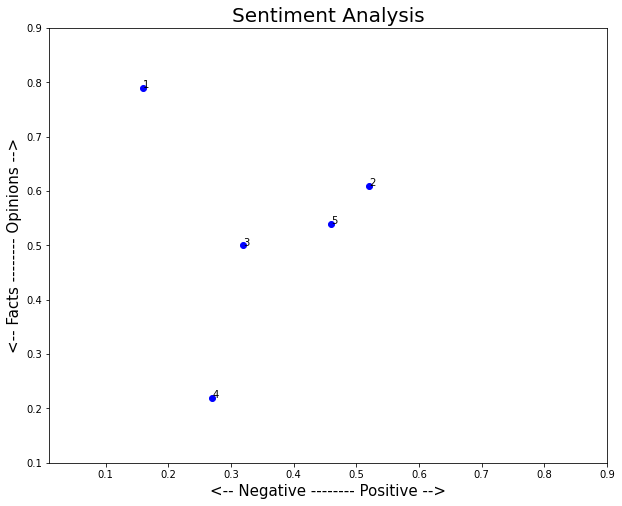

In [11]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index in range(1,6):
    x = df.polarity.loc[index]
    y = df.subjectivity.loc[index]
    plt.scatter(x, y, color='blue')
    plt.text(x+.0001, y+.0001, index, fontsize=10)
    plt.xlim(0.01, .9) 
    plt.ylim(0.1, 0.9) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [53]:
#At here, it looks I created a new column called reviews and gave values 'Good Reviews' and 'Bad Reviews'
#But then I deleted it.  It needs to be recreated.      

#Probably the code I use was this:
#df3= pd.DataFrame()
#df3['review']= df.index
#df3.rename(comment={0:'Bad Reviews',1:'Good Reviews'}, inplace=True)

TypeError: rename() got an unexpected keyword argument 'comment'

In [54]:
# df3= pd.DataFrame()
#for i in range (0,2):
 #  df3.loc[i,'polarity']= (df.head(100000).loc[df.Good_reviews == i].polarity.mean())
 #  df3.loc[i,'subjectivity']= (df.head(100000).loc[df.Good_reviews == i].subjectivity.mean())
  
# df3

AttributeError: 'DataFrame' object has no attribute 'Good_reviews'

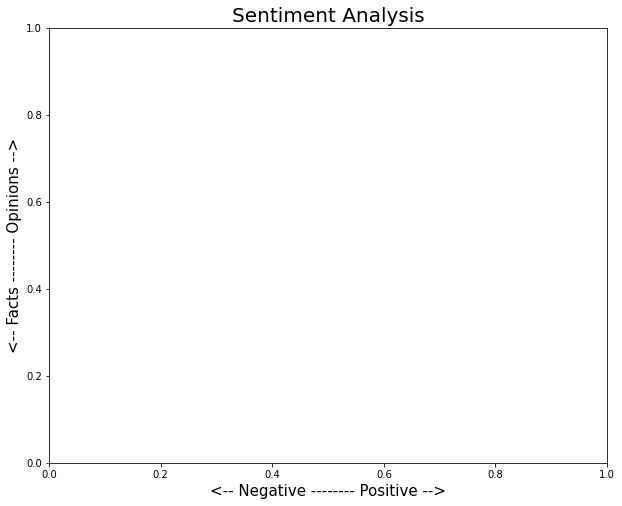

In [55]:
#import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [10, 8]
#
#for index, reviews in enumerate(df3.index):
#    x = df3.polarity.loc[reviews]
#    y = df3.subjectivity.loc[reviews]
#    plt.scatter(x, y, color='blue')
#    plt.text(x+.001, y+.001, df3['reviews'][index], fontsize=10)
#    plt.xlim(-.01, .4) 
#    plt.ylim(.5, .6) 
#    
#plt.title('Sentiment Analysis', fontsize=20)
#plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
#plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

#plt.show()


In [ ]:
#a = df.groupby(['Good_reviews'])['Id'].count()
#a = a.reset_index()
#a = a.rename(columns={'Id': 'number of samples'})
#fig, ax = plt.subplots(figsize=(4, 6))

#sns.barplot(x='Good_reviews', y='number of samples', data=a)

In [56]:
df2= df
df2['word_count']= df2['word_count'] //50*50

<AxesSubplot:xlabel='word_count'>

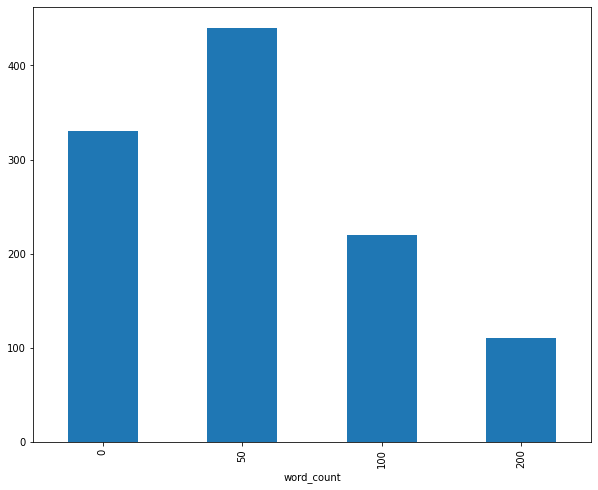

In [57]:
df.polarity.groupby(df.word_count // 50 * 50).count().plot(kind ='bar')

In [58]:
df_sub= df.loc[df.word_count //10*10]

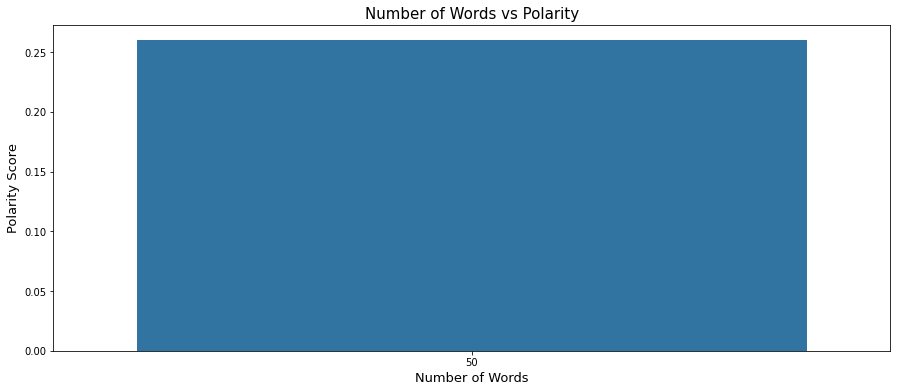

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(x='word_count', y='polarity', data=df_sub)
plt.xlabel('Number of Words', fontsize=13)
plt.ylabel('Polarity Score', fontsize=13)
plt.title('Number of Words vs Polarity', fontsize=15)
plt.show();

/home/nalinjindal/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity Score')

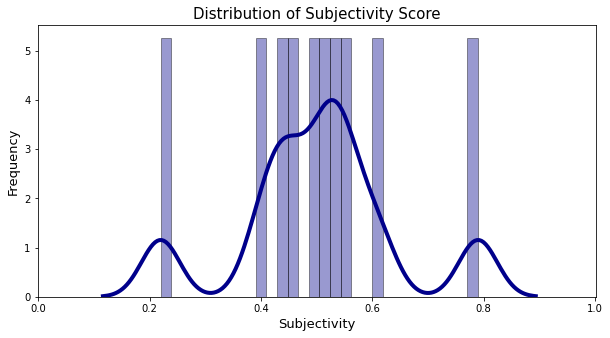

In [61]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['subjectivity'], hist=True, kde=True, 
             bins=int(30), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity Score', fontsize=15)